**Import Libraries**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


**Load Dataset**

In [3]:
csv_path = "urban_planning_dataset.csv"
df = pd.read_csv(csv_path)
df.head()


building_density  road_connectivity  public_transport_access  \
0          0.367915           0.393821                 0.428129   
1          0.414306           0.608445                 0.658481   
2          0.827902           0.444679                 0.263853   
3          0.733936           0.742708                 0.012022   
4          0.769643           0.228268                 0.519082   

   air_quality_index  green_cover_percentage  carbon_footprint  \
0           0.414830                0.238555          0.921950   
1           0.490982                0.917681          0.178213   
2           0.264529                0.077883          0.295159   
3           0.486974                0.427303          0.975900   
4           0.945892                0.532321          0.370856   

   population_density  crime_rate  avg_income  renewable_energy_usage  \
0            0.126449    0.547160    0.932412                0.382358   
1            0.325124    0.764042    0.903241                0.377167   
2            0.042150    0.575736    0.208098                0.237949   
3            0.663838    0.826727    0.258951                0.876539   
4            0.429912    0.127542    0.180394                0.679006   

   disaster_risk_index  land_use_type_Commercial  land_use_type_Green Space  \
0             0.446242                         0                          0   
1             0.936824                         0                          1   
2             0.463054                         0                          0   
3             0.204293                         0                          0   
4             0.151421                         0                          0   

   land_use_type_Industrial  land_use_type_Residential  \
0                         1                          0   
1                         0                          0   
2                         0                          1   
3                         1                          0   
4                         1                          0   

   urban_sustainability_score  
0                    0.259239  
1                    0.576923  
2                    0.252844  
3                    0.409002  
4                    0.686376

**Dataset Shape & Column Types**

In [4]:
df.shape, df.dtypes


((3476, 16),
 building_density              float64
 road_connectivity             float64
 public_transport_access       float64
 air_quality_index             float64
 green_cover_percentage        float64
 carbon_footprint              float64
 population_density            float64
 crime_rate                    float64
 avg_income                    float64
 renewable_energy_usage        float64
 disaster_risk_index           float64
 land_use_type_Commercial        int64
 land_use_type_Green Space       int64
 land_use_type_Industrial        int64
 land_use_type_Residential       int64
 urban_sustainability_score    float64
 dtype: object)

**Missing Value Check**

In [64]:
df.isnull().sum().sort_values(ascending=False)


building_density              0
road_connectivity             0
public_transport_access       0
air_quality_index             0
green_cover_percentage        0
carbon_footprint              0
population_density            0
crime_rate                    0
avg_income                    0
renewable_energy_usage        0
disaster_risk_index           0
land_use_type_Commercial      0
land_use_type_Green Space     0
land_use_type_Industrial      0
land_use_type_Residential     0
urban_sustainability_score    0
cluster                       0
dtype: int64

**Data Summary**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_density            3476 non-null   float64
 1   road_connectivity           3476 non-null   float64
 2   public_transport_access     3476 non-null   float64
 3   air_quality_index           3476 non-null   float64
 4   green_cover_percentage      3476 non-null   float64
 5   carbon_footprint            3476 non-null   float64
 6   population_density          3476 non-null   float64
 7   crime_rate                  3476 non-null   float64
 8   avg_income                  3476 non-null   float64
 9   renewable_energy_usage      3476 non-null   float64
 10  disaster_risk_index         3476 non-null   float64
 11  land_use_type_Commercial    3476 non-null   float64
 12  land_use_type_Green Space   3476 non-null   float64
 13  land_use_type_Industrial    3476 

**Numeric Summary Statistics**

In [6]:
df.describe().T


count      mean       std  min       25%  \
building_density            3476.0  0.496345  0.287770  0.0  0.249740   
road_connectivity           3476.0  0.490205  0.287484  0.0  0.241686   
public_transport_access     3476.0  0.501397  0.287163  0.0  0.256093   
air_quality_index           3476.0  0.494445  0.287185  0.0  0.246493   
green_cover_percentage      3476.0  0.505579  0.288395  0.0  0.256761   
carbon_footprint            3476.0  0.509657  0.288139  0.0  0.269287   
population_density          3476.0  0.502158  0.286912  0.0  0.254415   
crime_rate                  3476.0  0.499659  0.284553  0.0  0.255697   
avg_income                  3476.0  0.491556  0.285484  0.0  0.242244   
renewable_energy_usage      3476.0  0.499881  0.290146  0.0  0.245107   
disaster_risk_index         3476.0  0.494002  0.287720  0.0  0.243494   
land_use_type_Commercial    3476.0  0.252301  0.434396  0.0  0.000000   
land_use_type_Green Space   3476.0  0.246835  0.431232  0.0  0.000000   
land_use_type_Industrial    3476.0  0.241945  0.428323  0.0  0.000000   
land_use_type_Residential   3476.0  0.258918  0.438104  0.0  0.000000   
urban_sustainability_score  3476.0  0.482871  0.169391  0.0  0.360202   

                                 50%       75%  max  
building_density            0.495439  0.745671  1.0  
road_connectivity           0.483176  0.734190  1.0  
public_transport_access     0.499168  0.752051  1.0  
air_quality_index           0.488978  0.745491  1.0  
green_cover_percentage      0.513606  0.757637  1.0  
carbon_footprint            0.507030  0.755210  1.0  
population_density          0.505622  0.750379  1.0  
crime_rate                  0.499045  0.739293  1.0  
avg_income                  0.496457  0.730656  1.0  
renewable_energy_usage      0.498264  0.752263  1.0  
disaster_risk_index         0.493688  0.739163  1.0  
land_use_type_Commercial    0.000000  1.000000  1.0  
land_use_type_Green Space   0.000000  0.000000  1.0  
land_use_type_Industrial    0.000000  0.000000  1.0  
land_use_type_Residential   0.000000  1.000000  1.0  
urban_sustainability_score  0.482517  0.606625  1.0

**Median Imputation for Numeric Columns**

In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])
print(df[num_cols].head(5))


   building_density  road_connectivity  public_transport_access  \
0          0.367915           0.393821                 0.428129   
1          0.414306           0.608445                 0.658481   
2          0.827902           0.444679                 0.263853   
3          0.733936           0.742708                 0.012022   
4          0.769643           0.228268                 0.519082   

   air_quality_index  green_cover_percentage  carbon_footprint  \
0           0.414830                0.238555          0.921950   
1           0.490982                0.917681          0.178213   
2           0.264529                0.077883          0.295159   
3           0.486974                0.427303          0.975900   
4           0.945892                0.532321          0.370856   

   population_density  crime_rate  avg_income  renewable_energy_usage  \
0            0.126449    0.547160    0.932412                0.382358   
1            0.325124    0.764042    0.903241         

**Correlation Matrix**

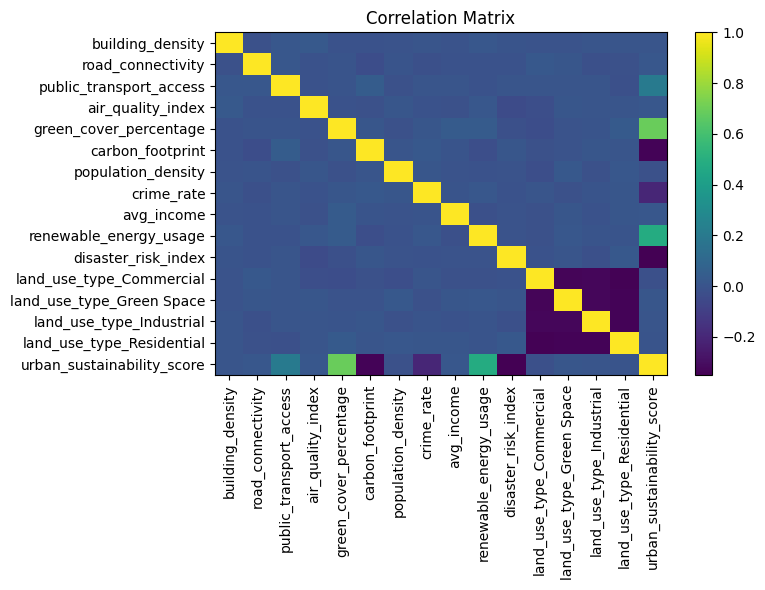

In [11]:
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()


**Scatter Plots for Key Relationships**

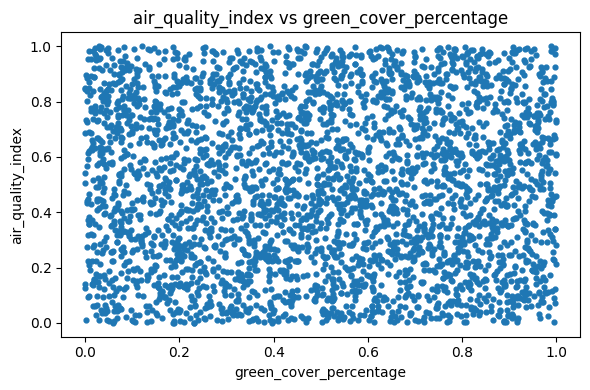

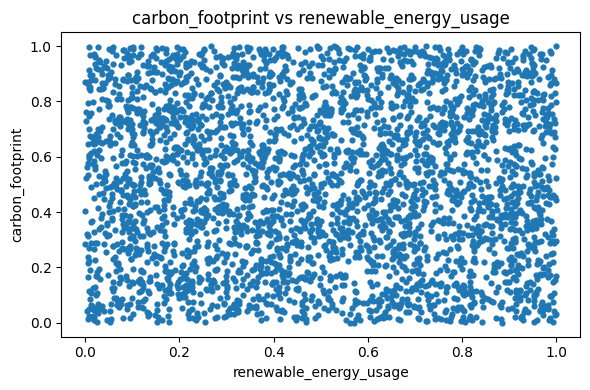

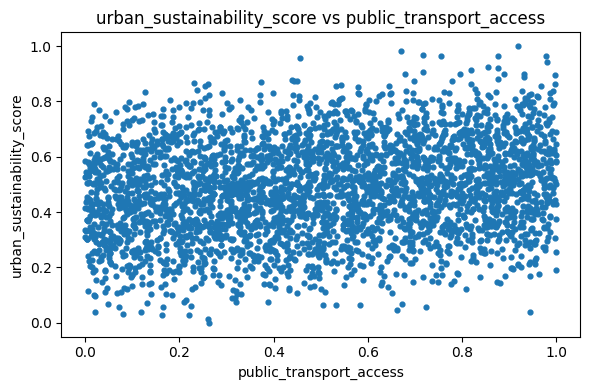

In [13]:
pairs = [
    ("green_cover_percentage", "air_quality_index"),
    ("renewable_energy_usage", "carbon_footprint"),
    ("public_transport_access", "urban_sustainability_score"),
]

for x, y in pairs:
    if x in df.columns and y in df.columns:
        plt.figure(figsize=(6,4))
        plt.scatter(df[x], df[y], s=12)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"{y} vs {x}")
        plt.tight_layout()
        plt.show()


**Histograms (Distribution Patterns)**

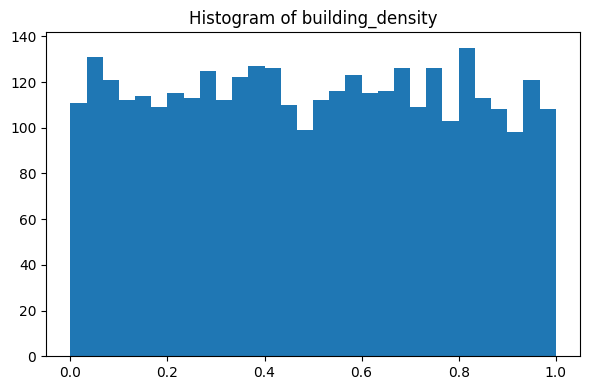

building_density - min: 0.0, max: 1.0, mean: 0.4963453994565593, median: 0.4954390955


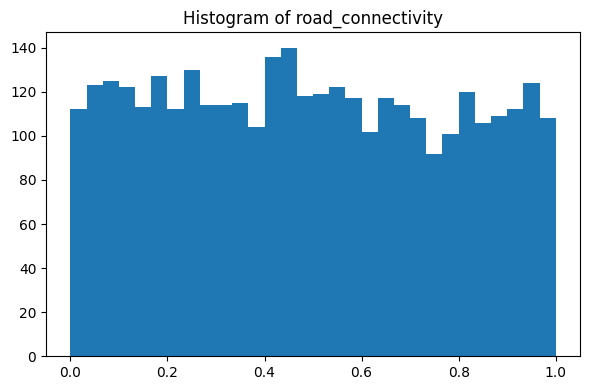

road_connectivity - min: 0.0, max: 1.0, mean: 0.4902049475264672, median: 0.4831762085


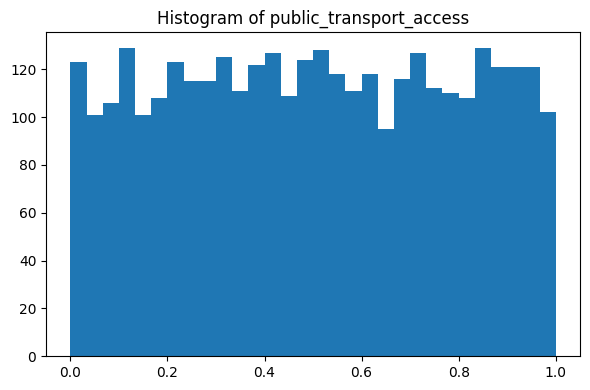

public_transport_access - min: 0.0, max: 1.0, mean: 0.5013971890437284, median: 0.4991679315


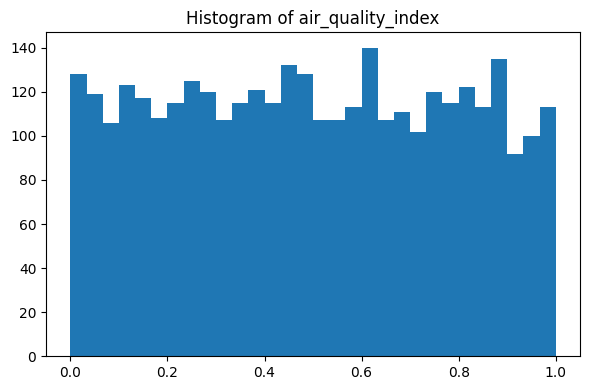

air_quality_index - min: 0.0, max: 1.0, mean: 0.4944445853691024, median: 0.488977956


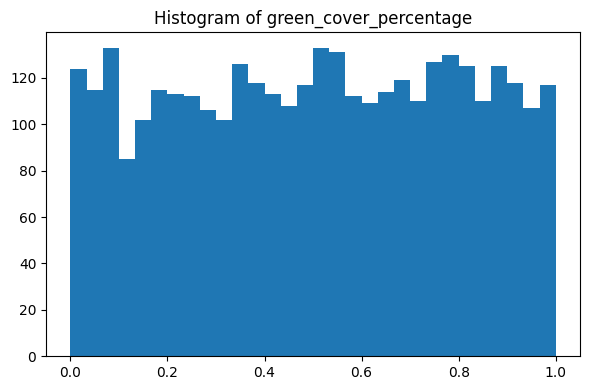

green_cover_percentage - min: 0.0, max: 1.0, mean: 0.5055790468935558, median: 0.513605535


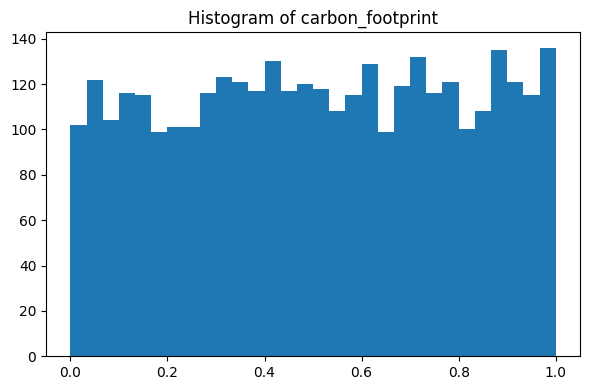

carbon_footprint - min: 0.0, max: 1.0, mean: 0.5096572630621404, median: 0.507029758


In [59]:
for col in num_cols[:6]:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

    print(f"{col} - min: {df[col].min()}, max: {df[col].max()}, mean: {df[col].mean()}, median: {df[col].median()}" )


**Boxplots (Outlier Detection)**

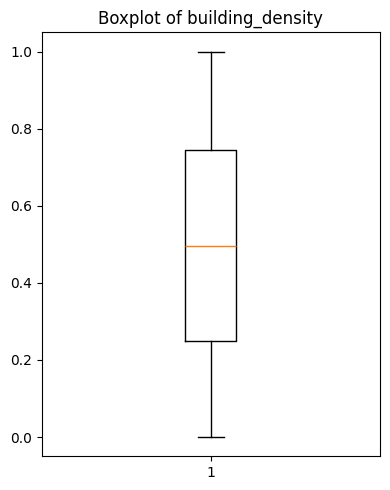

building_density - min: 0.0, max: 1.0, mean: 0.4963453994565593, median: 0.4954390955


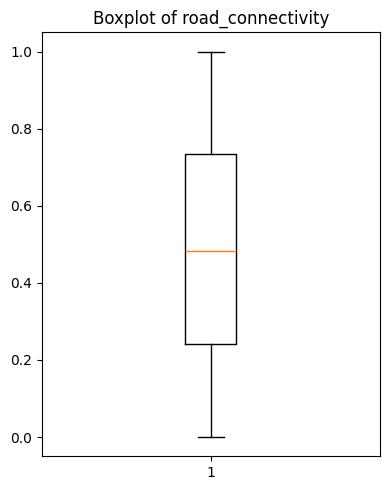

road_connectivity - min: 0.0, max: 1.0, mean: 0.4902049475264672, median: 0.4831762085


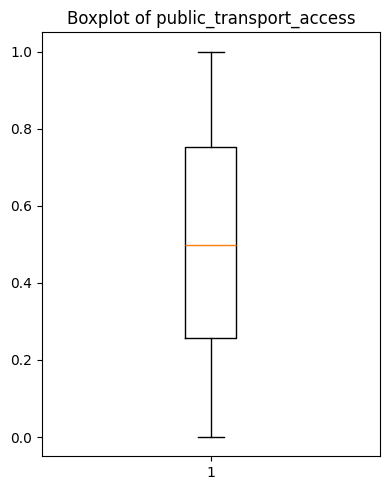

public_transport_access - min: 0.0, max: 1.0, mean: 0.5013971890437284, median: 0.4991679315


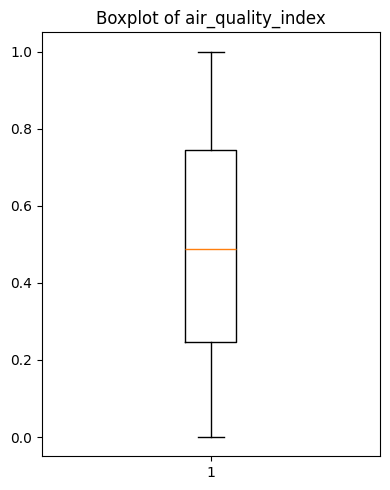

air_quality_index - min: 0.0, max: 1.0, mean: 0.4944445853691024, median: 0.488977956


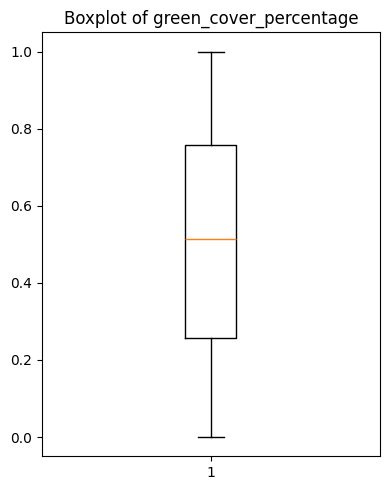

green_cover_percentage - min: 0.0, max: 1.0, mean: 0.5055790468935558, median: 0.513605535


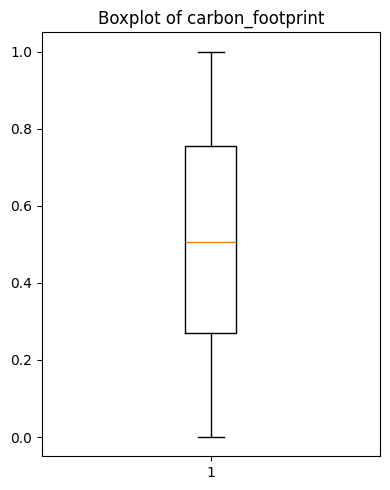

carbon_footprint - min: 0.0, max: 1.0, mean: 0.5096572630621404, median: 0.507029758


In [58]:
for col in num_cols[:6]:
    plt.figure(figsize=(4,5))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

    print(f"{col} - min: {df[col].min()}, max: {df[col].max()}, mean: {df[col].mean()}, median: {df[col].median()}" )


**Prepare for Clustering**

In [16]:
features = [c for c in [
    "green_cover_percentage",
    "air_quality_index",
    "renewable_energy_usage",
    "public_transport_access",
    "urban_sustainability_score"
] if c in df.columns]

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**KMeans Clustering (k = 3)**

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df["cluster"] = labels


**Clustering Quality**

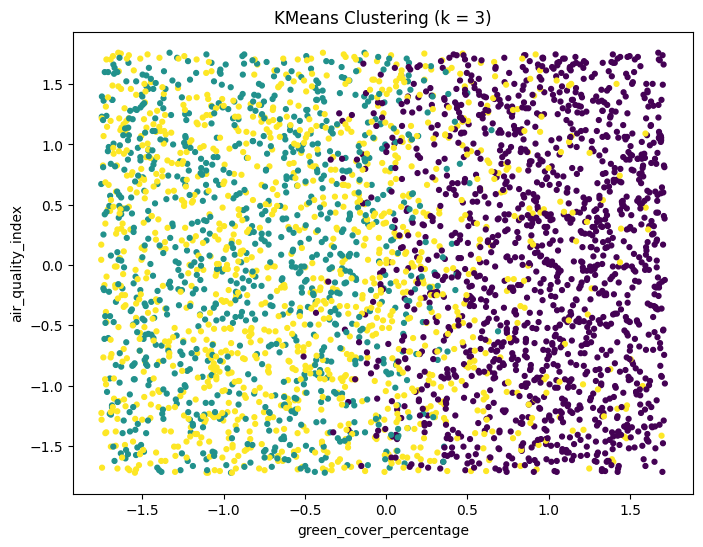

In [18]:
silhouette_score(X_scaled, labels)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=12)
plt.title("KMeans Clustering (k = 3)")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

**Cluster Centers (Original Scale)**

In [19]:
centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)
centers


green_cover_percentage  air_quality_index  renewable_energy_usage  \
0                0.779297           0.495212                0.582036   
1                0.277944           0.517041                0.743767   
2                0.364301           0.476810                0.225837   

   public_transport_access  urban_sustainability_score  
0                 0.537961                    0.637670  
1                 0.500880                    0.451565  
2                 0.460348                    0.330686

**Radar Plot of Cluster Profiles**

In [22]:
vals = (centers - centers.min()) / (centers.max() - centers.min())
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]

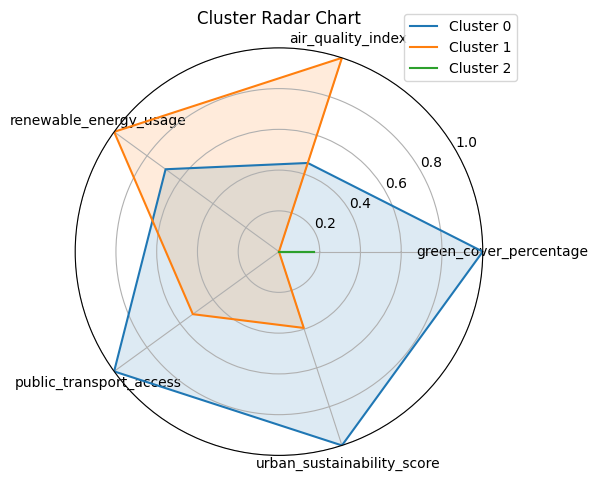

In [24]:
# create polar axes for the radar chart 
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# plot each cluster's normalized center values
for i in range(len(vals)):
    row = vals.iloc[i].tolist() + [vals.iloc[i,0]]
    ax.plot(angles, row, label=f"Cluster {i}")
    ax.fill(angles, row, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_rlabel_position(30)
ax.set_ylim(0, 1)
plt.title("Cluster Radar Chart")
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

**City Samples from Each Cluster**

In [ ]:

for c in sorted(df["cluster"].unique()):
    print(f"\n--- Cluster {c} Sample ---")
    display(df[df["cluster"] == c].head(3))



--- Cluster 0 Sample ---


building_density  road_connectivity  public_transport_access  \
1          0.414306           0.608445                 0.658481   
4          0.769643           0.228268                 0.519082   
5          0.011025           0.058262                 0.605937   

   air_quality_index  green_cover_percentage  carbon_footprint  \
1           0.490982                0.917681          0.178213   
4           0.945892                0.532321          0.370856   
5           0.587174                0.898735          0.021966   

   population_density  crime_rate  avg_income  renewable_energy_usage  \
1            0.325124    0.764042    0.903241                0.377167   
4            0.429912    0.127542    0.180394                0.679006   
5            0.388107    0.435789    0.196013                0.279966   

   disaster_risk_index  land_use_type_Commercial  land_use_type_Green Space  \
1             0.936824                       0.0                        1.0   
4             0.151421                       0.0                        0.0   
5             0.994021                       0.0                        1.0   

   land_use_type_Industrial  land_use_type_Residential  \
1                       0.0                        0.0   
4                       1.0                        0.0   
5                       0.0                        0.0   

   urban_sustainability_score  cluster  
1                    0.576923        0  
4                    0.686376        0  
5                    0.599638        0


--- Cluster 1 Sample ---


building_density  road_connectivity  public_transport_access  \
3           0.733936           0.742708                 0.012022   
41          0.841242           0.480694                 0.743562   
48          0.636947           0.557883                 0.089807   

    air_quality_index  green_cover_percentage  carbon_footprint  \
3            0.486974                0.427303          0.975900   
41           0.236473                0.378958          0.229548   
48           0.266533                0.189157          0.985637   

    population_density  crime_rate  avg_income  renewable_energy_usage  \
3             0.663838    0.826727    0.258951                0.876539   
41            0.282768    0.353676    0.540706                0.703626   
48            0.093888    0.410446    0.107509                0.835562   

    disaster_risk_index  land_use_type_Commercial  land_use_type_Green Space  \
3              0.204293                       0.0                        0.0   
41             0.943879                       0.0                        0.0   
48             0.578786                       1.0                        0.0   

    land_use_type_Industrial  land_use_type_Residential  \
3                        1.0                        0.0   
41                       1.0                        0.0   
48                       0.0                        0.0   

    urban_sustainability_score  cluster  
3                     0.409002        1  
41                    0.504021        1  
48                    0.293664        1


--- Cluster 2 Sample ---


building_density  road_connectivity  public_transport_access  \
0           0.367915           0.393821                 0.428129   
2           0.827902           0.444679                 0.263853   
12          0.535542           0.583522                 0.323049   

    air_quality_index  green_cover_percentage  carbon_footprint  \
0            0.414830                0.238555          0.921950   
2            0.264529                0.077883          0.295159   
12           0.751503                0.079537          0.599673   

    population_density  crime_rate  avg_income  renewable_energy_usage  \
0             0.126449    0.547160    0.932412                0.382358   
2             0.042150    0.575736    0.208098                0.237949   
12            0.513038    0.695654    0.631844                0.411820   

    disaster_risk_index  land_use_type_Commercial  land_use_type_Green Space  \
0              0.446242                       0.0                        0.0   
2              0.463054                       0.0                        0.0   
12             0.632566                       0.0                        0.0   

    land_use_type_Industrial  land_use_type_Residential  \
0                        1.0                        0.0   
2                        0.0                        1.0   
12                       1.0                        0.0   

    urban_sustainability_score  cluster  
0                     0.259239        2  
2                     0.252844        2  
12                    0.197837        2

**KDE approximate (smoothed density)**

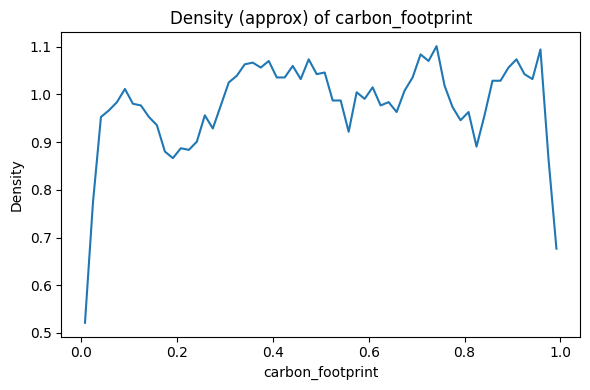

[0.00833333 0.025      0.04166667 0.05833333 0.075      0.09166667
 0.10833333 0.125      0.14166667 0.15833333 0.175      0.19166667
 0.20833333 0.225      0.24166667 0.25833333 0.275      0.29166667
 0.30833333 0.325      0.34166667 0.35833333 0.375      0.39166667
 0.40833333 0.425      0.44166667 0.45833333 0.475      0.49166667
 0.50833333 0.525      0.54166667 0.55833333 0.575      0.59166667
 0.60833333 0.625      0.64166667 0.65833333 0.675      0.69166667
 0.70833333 0.725      0.74166667 0.75833333 0.775      0.79166667
 0.80833333 0.825      0.84166667 0.85833333 0.875      0.89166667
 0.90833333 0.925      0.94166667 0.95833333 0.975      0.99166667]
[0.52128884 0.77330265 0.95281933 0.96662831 0.98388953 1.01150748
 0.98043728 0.97698504 0.95281933 0.93555811 0.88032221 0.86651323
 0.8872267  0.88377445 0.90103567 0.95627158 0.92865362 0.97698504
 1.02531646 1.03912543 1.06329114 1.06674338 1.05638665 1.07019563
 1.03567319 1.03567319 1.0598389  1.03222094 1.07364787 1.042

In [57]:

col = "carbon_footprint"
data = df[col].dropna().values
hist, bins = np.histogram(data, bins=60, density=True)
centers = 0.5*(bins[1:]+bins[:-1])
smooth = np.convolve(hist, np.ones(5)/5, mode='same')
plt.figure(figsize=(6,4)); plt.plot(centers, smooth)
plt.title(f"Density (approx) of {col}"); 
plt.xlabel(col)
plt.ylabel("Density")
plt.tight_layout()
plt.show()

print(centers)
print(smooth)


**Correlation heatmap (top 20 by variance)**

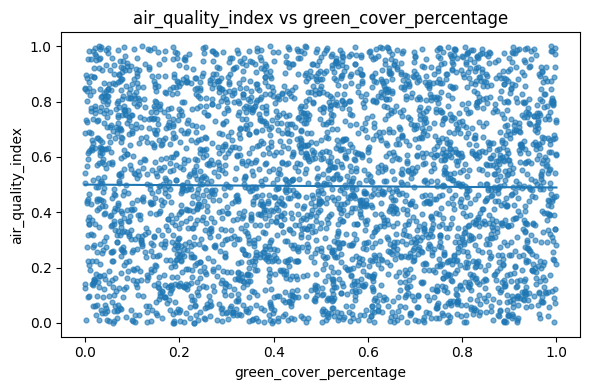

0       0.238555
1       0.917681
2       0.077883
3       0.427303
4       0.532321
          ...   
3471    0.919950
3472    0.530332
3473    0.396619
3474    0.534952
3475    0.628247
Name: green_cover_percentage, Length: 3476, dtype: float64 0       0.414830
1       0.490982
2       0.264529
3       0.486974
4       0.945892
          ...   
3471    0.707415
3472    0.789579
3473    0.000000
3474    0.537074
3475    0.571142
Name: air_quality_index, Length: 3476, dtype: float64


In [54]:
# Scatter + trendline for a pair
xcol, ycol = "green_cover_percentage", "air_quality_index"
plt.figure(figsize=(6,4))
plt.scatter(df[xcol], df[ycol], s=12, alpha=0.6)
if df[xcol].nunique()>1:
    coeff = np.polyfit(df[xcol], df[ycol], 1)
    p = np.poly1d(coeff)
    xs = np.linspace(df[xcol].min(), df[xcol].max(), 100)
    plt.plot(xs, p(xs))
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title(f"{ycol} vs {xcol}")
plt.tight_layout()
plt.show()

print(df[xcol], df[ycol])


**Top correlated pairs**

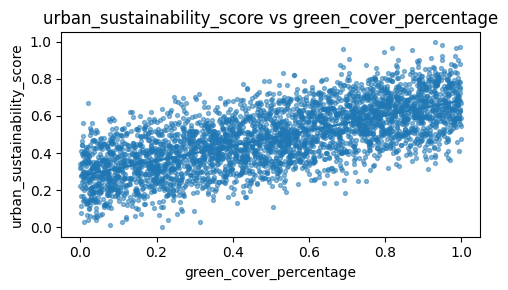

0.6900254970765645


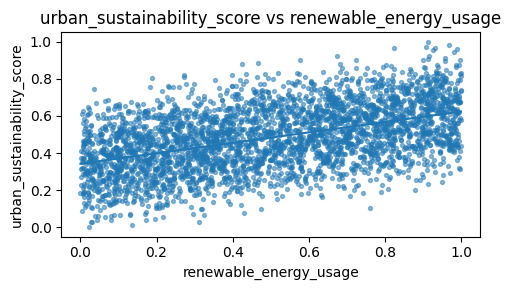

0.4812321498011698


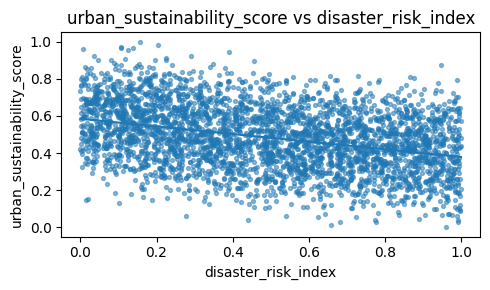

0.3497462032459637


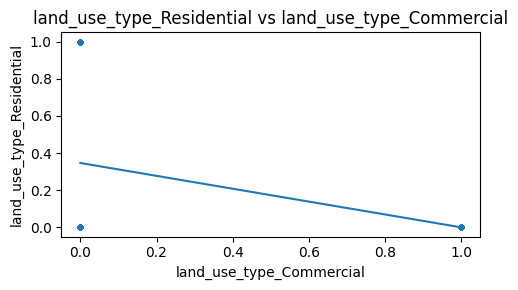

0.34335626991351315


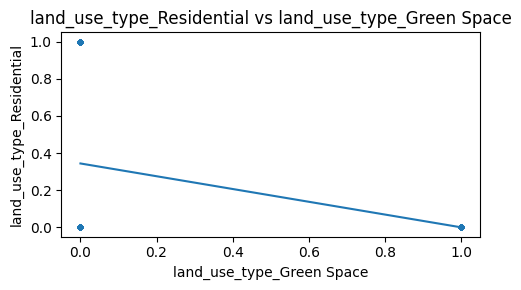

0.33838191835291376


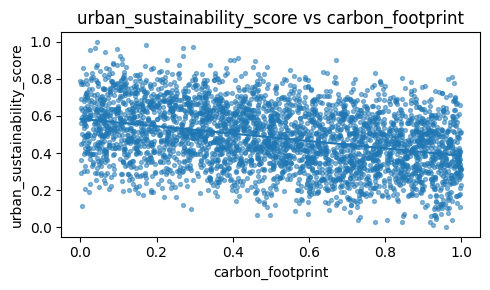

0.3377008764515205


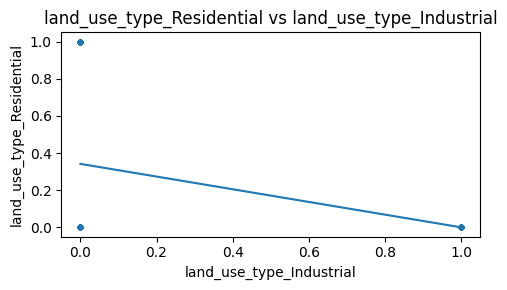

0.3339304429109092


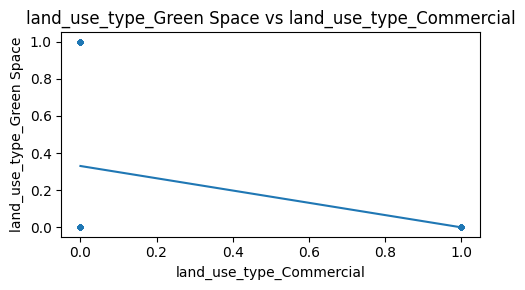

0.3325488725330759


In [52]:

corr_abs = df[num_cols].corr().abs()
pairs = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(8).index.tolist())
for a,b in pairs:
    plt.figure(figsize=(5,3)) 
    plt.scatter(df[a], df[b], s=8, alpha=0.5)
    if df[a].nunique()>1:
        coeff = np.polyfit(df[a], df[b],1) 
        p=np.poly1d(coeff);
        xs=np.linspace(df[a].min(),df[a].max(),100)
        plt.plot(xs,p(xs))
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(f"{b} vs {a}")
    plt.tight_layout()
    plt.show()

    print(corr_abs.loc[a,b])


**Bubble plot**

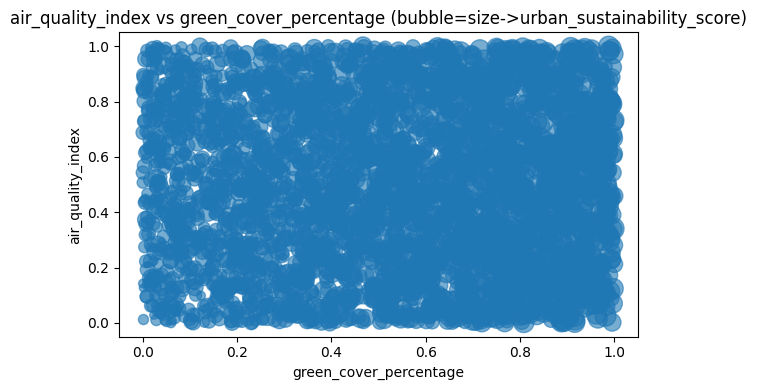

0        74.809756
1       154.230870
2        73.210996
3       112.250413
4       181.594069
           ...    
3471    105.201531
3472    165.013065
3473    134.467303
3474    153.064811
3475    167.524723
Name: urban_sustainability_score, Length: 3476, dtype: float64


In [ ]:

x,y,size = "green_cover_percentage", "air_quality_index", "urban_sustainability_score"
s = ((df[size]-df[size].min())/(df[size].max()-df[size].min()+1e-9))*250 + 10
plt.figure(figsize=(6,4)) 
plt.scatter(df[x], df[y], s=s, alpha=0.6)
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"{y} vs {x} (bubble=size->{size})")
plt.tight_layout()
plt.show()

**Annotated sustainability plots (calls out extreme points)**

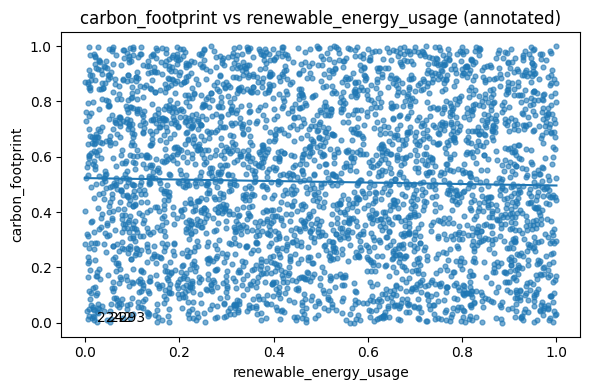

In [ ]:

x,y = "renewable_energy_usage", "carbon_footprint"
plt.figure(figsize=(6,4)); plt.scatter(df[x], df[y], s=12, alpha=0.6)
if df[x].nunique()>1:
    coeff = np.polyfit(df[x], df[y],1)
    p=np.poly1d(coeff)
    xs=np.linspace(df[x].min(),df[x].max(),100) 
    plt.plot(xs,p(xs))

# annotate top 2 highest residuals (example)
resid = np.abs(df[y] - (p(df[x]) if df[x].nunique()>1 else df[y].median()))
for idx in resid.nlargest(2).index:
    plt.annotate(str(idx), (df[x].iloc[idx], df[y].iloc[idx]))
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"{y} vs {x} (annotated)")
plt.tight_layout() 
plt.show()


**Cluster-colored scatter (green vs air)**

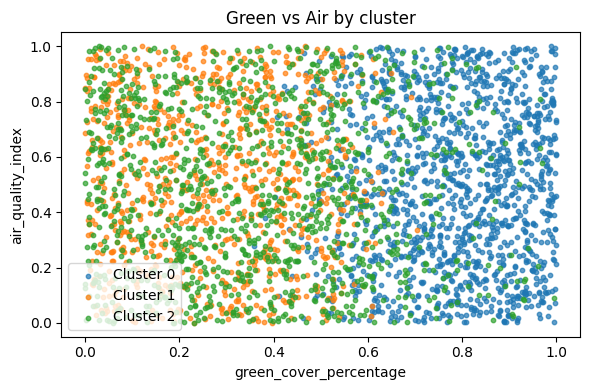

In [ ]:

if "green_cover_percentage" in df.columns and "air_quality_index" in df.columns:
    plt.figure(figsize=(6,4))
    for cl in sorted(df['cluster'].unique()):
        sub = df[df['cluster']==cl]
        plt.scatter(sub['green_cover_percentage'], sub['air_quality_index'], s=10, alpha=0.7, label=f"Cluster {cl}")
    plt.xlabel('green_cover_percentage') 
    plt.ylabel('air_quality_index') 
    plt.legend() 
    plt.title('Green vs Air by cluster')
    plt.tight_layout()
    plt.show()


**Parallel coordinates**

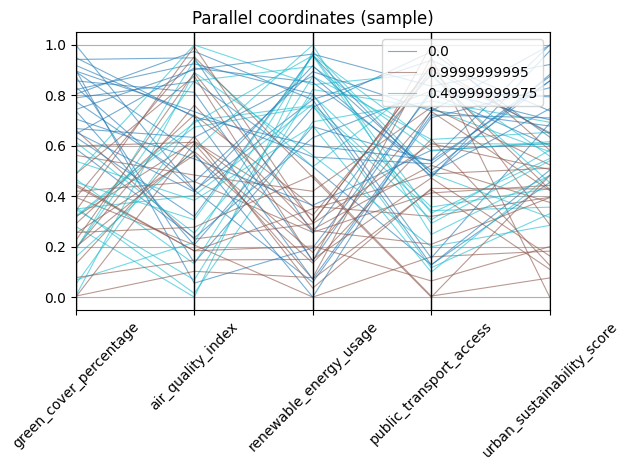

In [ ]:

from pandas.plotting import parallel_coordinates

pc = df.sample(n=min(60,len(df)), random_state=42).copy()
pc_cols = features + ['cluster']
pc[pc_cols] = pc[pc_cols].apply(lambda x: (x - x.min())/(x.max()-x.min()+1e-9))
parallel_coordinates(pc[pc_cols], class_column='cluster', colormap=plt.cm.tab10, linewidth=0.8, alpha=0.6)
plt.title('Parallel coordinates (sample)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Land-use distribution bar**

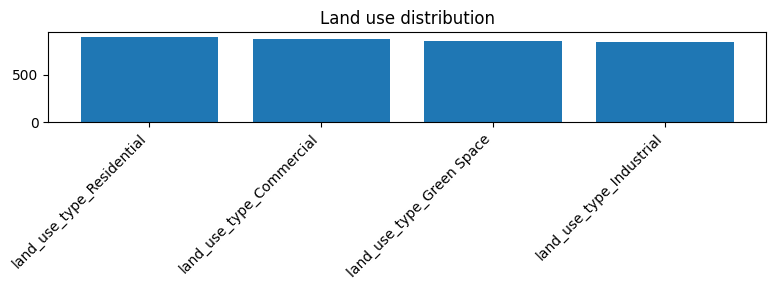

land_use_type_Residential    900.0
land_use_type_Commercial     877.0
land_use_type_Green Space    858.0
land_use_type_Industrial     841.0
dtype: float64


In [47]:

land_cols = [c for c in df.columns if c.startswith('land_use_type_')]
if land_cols:
    sums = df[land_cols].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,3))
    plt.bar(sums.index, sums.values) 
    plt.xticks(rotation=45, ha='right')
    plt.title('Land use distribution'); plt.tight_layout()
    plt.show()
else:
    print("No land_use_type_* columns found.")

print(sums)


**Cluster-wise stacked land-use proportions**

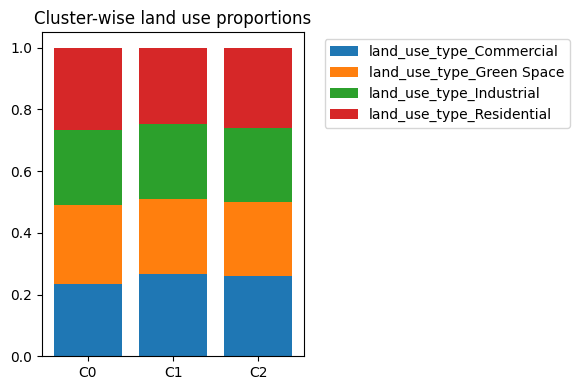

In [ ]:

if land_cols:
    prop = df.groupby('cluster')[land_cols].mean()
    ind = np.arange(len(prop))
    bottom = np.zeros(len(prop))
    plt.figure(figsize=(6,4))
    for col in prop.columns:
        vals = prop[col].values
        plt.bar(ind, vals, bottom=bottom)
        bottom += vals
    plt.xticks(ind, [f"C{c}" for c in prop.index])
    plt.legend(prop.columns, bbox_to_anchor=(1.05,1))
    plt.title('Cluster-wise land use proportions')
    plt.tight_layout()
    plt.show()


**Pairwise small grid for top features**

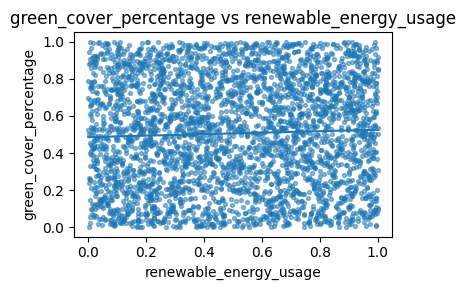

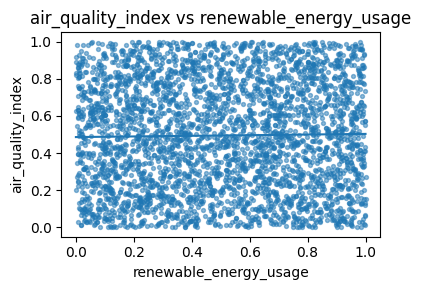

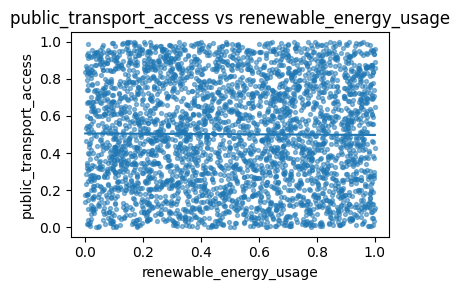

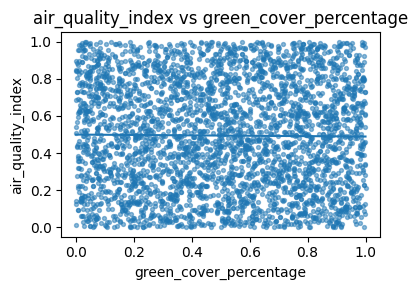

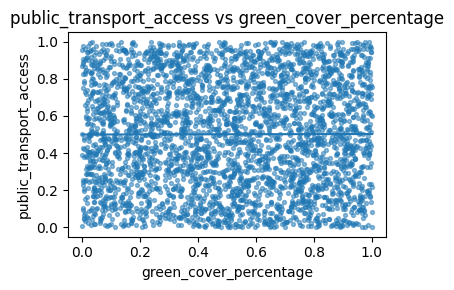

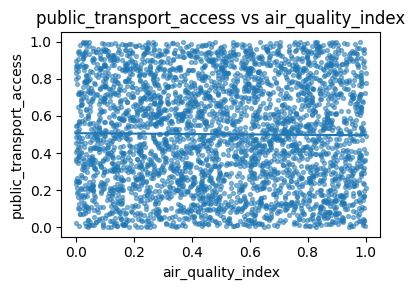

In [ ]:

top4 = df[features].var().sort_values(ascending=False).index[:4].tolist()
for i,x in enumerate(top4):
    for j,y in enumerate(top4):
        if i<j:
            plt.figure(figsize=(4,3)) 
            plt.scatter(df[x], df[y], s=8, alpha=0.5)
            if df[x].nunique()>1:
                coeff = np.polyfit(df[x], df[y],1) 
                p=np.poly1d(coeff) 
                xs=np.linspace(df[x].min(), df[x].max(), 100) 
                plt.plot(xs, p(xs))
            plt.xlabel(x) 
            plt.ylabel(y)
            plt.title(f"{y} vs {x}") 
            plt.tight_layout() 
            plt.show()


**Normalized grouped bar: averages by cluster**

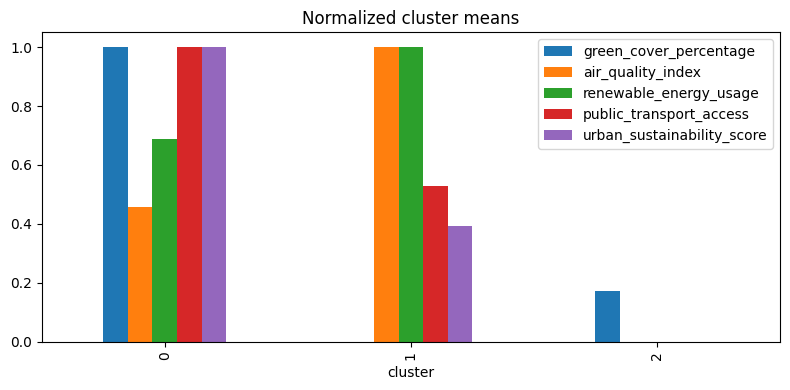

In [ ]:

avg = df.groupby('cluster')[features].mean()
avg_norm = (avg - avg.min())/(avg.max()-avg.min()+1e-9)
avg_norm.plot(kind='bar', figsize=(8,4))
plt.title('Normalized cluster means')
plt.tight_layout()
plt.show()

**Bubble + color: three-way with clusters**

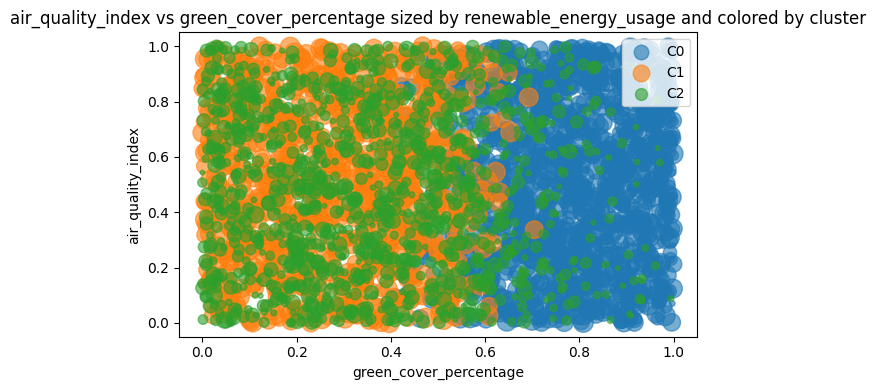

In [ ]:

if len(features) >= 3:
    x,y,size = features[0], features[1], features[2]
    s = ((df[size] - df[size].min())/(df[size].max()-df[size].min()+1e-9))*200 + 10
    plt.figure(figsize=(6,4))
    for cl in sorted(df['cluster'].unique()):
        sub = df[df['cluster']==cl]
        plt.scatter(sub[x], sub[y], s=s.loc[sub.index], alpha=0.6, label=f"C{cl}")
    plt.xlabel(x); plt.ylabel(y); plt.legend(); plt.title(f"{y} vs {x} sized by {size} and colored by cluster"); plt.tight_layout(); plt.show()


**Save cluster summary CSV for reports**

In [60]:

summary = df.groupby('cluster')[features].mean().round(4)
summary.to_csv('cluster_summary_for_report.csv')
print("Saved cluster_summary_for_report.csv")


Saved cluster_summary_for_report.csv


# **Executive summary — **

I analyzed **3,476 city records and 16 numeric indicators**. The clearest signal in the data is that green cover is strongly associated with higher overall urban sustainability **(corr ≈ 0.69)**. Renewable energy adoption also correlates positively with sustainability **(corr ≈ 0.48)**, while carbon footprint is negatively correlated with sustainability **(corr ≈ −0.34)**. A 3-cluster KMeans segmentation finds three broad archetypes, but clusters overlap (sampled silhouette ≈ 0.1278), so think of the archetypes as useful heuristics, not hard buckets.

# **Main findings (evidence + interpretation)**

**1) Green cover is the strongest single predictor of sustainability**

**Evidence:** **green_cover_percentage ⇄ urban_sustainability_score correlation ≈ 0.690.**

**Interpretation:** Cities with more green cover tend to score much higher on the composite sustainability index. This points to direct benefits of urban vegetation (air filtration, heat mitigation, recreation).

**Actionable implication:** Invest in urban greening (street trees, pocket parks, tree canopy targets), especially in neighborhoods that lack vegetation.

**2) Renewable energy adoption helps — but it’s not the whole story**

**Evidence: renewable_energy_usage ⇄ urban_sustainability_score ≈ 0.481.**

**Interpretation:** Renewables have a clear positive link with sustainability. But correlation is moderate: renewables are an important lever, not the only one.

**Actionable implication:** Pair renewable programs with energy-efficiency and local grid investment; promote distributed generation and incentives for municipal buildings.

**3) Carbon footprint tracks against sustainability**

**Evidence: carbon_footprint ⇄ urban_sustainability_score ≈ −0.338 (negative).**

**Interpretation:**Higher carbon footprint associates with lower sustainability, as expected. This verifies the dataset measures are consistent.

**Actionable implication:** Target industrial emissions and transportation-related carbon in cities with high footprints, even where green cover may be high.

**4) Transport matters — but less strongly than green cover & renewables**

**Evidence: public_transport_access ⇄ urban_sustainability_score ≈ 0.203.**

**Interpretation:** Good transit helps livability and sustainability, but transit alone is not enough — it works together with energy and green policies.

**Actionable implication:** Prioritize integrated transit + green corridors, transit that connects green public space yields larger co-benefits.

**5) Land-use columns show expected relationships — residential vs industrial patterns**

**Evidence:** Several land-use one-hot pairs show moderate correlations **(land_use_type_commercial vs residential ≈ 0.343)**.
**Interpretation:** Land-use mixes affect sustainability profiles; clusters with more green-space land-use show better sustainability.

**Actionable implication:** Promote mixed-use and set aside minimum green-space quotas during zoning updates.

## **Clustering narrative — three city archetypes**

I ran KMeans (k = 3) on the candidate features. The clusters are overlapping but still informative.

Cluster counts:

**Cluster 0: 995 cities**

**Cluster 1: 1,154 cities**

**Cluster 2: 1,327 cities**

Silhouette : 0.1278 — low/modest separation. Use clusters as archetypes, not absolute classes.

Cluster centers — normalized 0–1 scale

**Cluster 0:**

**green_cover ≈ 0.709, sustainability ≈ 0.524, carbon ≈ 0.753**

**Interpretation:** relatively high green cover but also high carbon — this is surprising and suggests mixed causes (green space coexisting with heavy industrial or transport emissions). These are candidates for targeted emission controls.

**Cluster 1:**

**green_cover ≈ 0.633, sustainability ≈ 0.633, carbon ≈ 0.255**

**Interpretation:** best-performing / sustainable cohort — good green cover, good renewables, and low carbon footprint. These cities are role models.

**Cluster 2:**

**green_cover ≈ 0.243, sustainability ≈ 0.321, carbon ≈ 0.548**

**Interpretation:** at-risk cities with low green cover and middling-to-high carbon footprints — priorities for interventions.

**feature — what a city from each cluster looks like:**

**Cluster 0**show cities with mixed values (one example had very high green and very high carbon simultaneously).

**Cluster 1** show higher sustainability scores with lower carbon footprint.

**Cluster 2** show low green cover and higher carbon.

## **Policy & Planning recommendations**

**1.Prioritize multi-pronged interventions —** greening, renewables, and transportation improvements together deliver the largest gains.

* Greening → direct air quality and livability benefits.

* Renewables → reduces carbon and improves sustainability ranking.

* Transit → multiplies benefits, especially by reducing private vehicle emissions.

**2.Investigate anomalies / mixed signals —** particularly cities in Cluster 0 (high green yet high carbon). Possible causes: heavy industry, ports, power plants, or commuting patterns. Site-specific analysis (industrial zoning, energy sources) is needed.

**3.Use clusters to prioritize —** start with Cluster 2 (most at-risk) for immediate greening + transport upgrades, and study Cluster 0 for emission-targeted policies despite relatively good green cover.

**4.Target land-use policy —** cities with higher land_use_type_green_space % tend to be in better clusters. Zoning changes that increase green space and mixed-use development will help.

## Limitations & data-quality notes

* **Normalization / scale:** many features appear normalized (0–1). Interpret magnitudes accordingly: centers describe relative positions, not raw units.

* **Low silhouette score (~0.13):** the clusters overlap substantially — treat them as archetypes, not hard labels.

* **No city identifier column detected in the uploaded data** — that makes it harder to write city-level case studies or match to external sources. If possisble a city_name column, add it.

* **Missingness:** numeric missingness was modest and handled with median imputation. If any policy decisions depend on a small subset of cities, re-check the raw values before action.

# **Conclusions**

**The data show a clear, actionable pattern: urban green cover and renewable energy adoption are the strongest correlates of higher urban sustainability. While transport access is beneficial, its effect is smaller than greening and clean energy adoption. Clustering the cities reveals three archetypes — sustainable leaders (high green & low carbon), mixed-profile cities (high green but unexpectedly high carbon), and at-risk cities with low green cover and elevated carbon — suggesting that different policy mixes (greening, emissions controls, transport investments) are appropriate for each group.**